In [165]:
!pip install seaborn

# Import libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 1. Data Preparation

## 1.1 import dataset

In [167]:
uncleaned_df = pd.read_csv("dataset.csv")
uncleaned_df.head(10)

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),...,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),...,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
5,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
6,7001903704,2017,10,20,23,18,4,43.625201,-79.528515,Etobicoke-Lakeshore (5),...,0,0,0,0,0,1,0,0,0,0
7,7001903704,2017,10,20,23,18,4,43.625201,-79.528515,Etobicoke-Lakeshore (5),...,0,0,0,0,0,1,0,0,0,0
8,1095752,2009,2,26,23,19,3,43.663245,-79.330190,Beaches-East York (32),...,0,0,0,0,0,1,0,0,0,0
9,1095752,2009,2,26,23,19,3,43.663245,-79.330190,Beaches-East York (32),...,0,0,0,0,0,1,0,0,0,0


In [168]:
uncleaned_df.shape

(12557, 56)

In [169]:
uncleaned_df.dtypes.value_counts()


object     30
int64      24
float64     2
Name: count, dtype: int64

In [170]:
uncleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ACCNUM         12557 non-null  int64  
 1   YEAR           12557 non-null  int64  
 2   MONTH          12557 non-null  int64  
 3   DAY            12557 non-null  int64  
 4   HOUR           12557 non-null  int64  
 5   MINUTES        12557 non-null  int64  
 6   WEEKDAY        12557 non-null  int64  
 7   LATITUDE       12557 non-null  float64
 8   LONGITUDE      12557 non-null  float64
 9   Ward_Name      12557 non-null  object 
 10  Ward_ID        12557 non-null  int64  
 11  Hood_Name      12557 non-null  object 
 12  Hood_ID        12557 non-null  int64  
 13  Division       12557 non-null  object 
 14  District       12557 non-null  object 
 15  STREET1        12557 non-null  object 
 16  STREET2        12557 non-null  object 
 17  OFFSET         12557 non-null  object 
 18  ROAD_C

# Dataset Description

ACCNUMAccident Number

YEAR Year of Accident

MONTH Month of Accident

DAY Day of Accident

HOUR Hour of Accident (24hrs)

MINUTES Minute of Accident

WEEKDAY Weekday of Accident (0 is Monday)

LATITUDE Latitude

LONGITUDE Longitude

Ward_NameCity Ward

Ward_IDCity Ward ID

Hood_NameNeighbourhood Name

Hood_IDNeighbourhood ID

DivisionPolice Division

DistrictCity District

STREET1Street of Accident

STREET2Street of Accident

OFFSETDistance and direction of the accident

ROAD_CLASSRoad Classification

LOCCOORDLocation Coordinate

ACCLOCAccident Location

TRAFFCTL Traffic Control Type

VISIBILITY Environment Condition

LIGHT Light Condition

RDSFCOND Road Surface Condition

ACCLASS Classification of Accident

IMPACTYPE Initial Impact Type

INVTYPE Involvement Type

INVAGE Age of Involved Party

INJURY Severity of Injury

FATAL_NO Sequential Number

INITDIR Initial Direction of Travel

VEHTYPE Type of Vehicle

MANOEUVER Vehicle Manouever

DRIVACT Apparent Driver Action

DRIVCOND Driver Condition

PEDTYPE Pedestrian Crash Type

PEDACT Pedestrian Action

PEDCOND Condition of Pedestrian

CYCLISTYPE Cyclist Crash Type

CYCACT Cyclist Action

CYCCOND Cyclist Condition

PEDESTRIAN Pedestrian Involved In Collision

CYCLIST Cyclists Involved in Collision

AUTOMOBILE Driver Involved in Collision

MOTORCYCLE Motorcyclist Involved in Collision

TRUCK Truck Driver Involved in Collision

TRSN_CITY_VEH Transit or City Vehicle Involved in Collision

EMERG_VEH Emergency Vehicle Involved in Collision

PASSENGER Passenger Involved in Collision

SPEEDINGSpeeding Related Collision

AG_DRIVAggressive and Distracted Driving Collision

REDLIGHT Red Light Related Collision

ALCOHOL Alcohol Related Collision

DISABILITY Medical or Physical Disability Related Collision

FATAL Fatal Injury in Collision

## 1.1 Data Cleaning

Replacing blank values to NA

In [171]:
df = uncleaned_df.replace(' ', np.nan, regex = False)
df.sample(10)

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
12224,1351606,2013,4,13,18,46,5,43.773147,-79.283894,Scarborough-Agincourt (40),...,0,0,0,1,1,1,1,1,0,1
910,1351710,2013,4,13,11,30,5,43.629045,-79.490390,Etobicoke-Lakeshore (5),...,0,0,0,1,0,0,0,0,0,0
2439,4001557370,2014,2,19,9,56,2,43.670326,-79.455784,Davenport (17),...,0,0,0,0,0,1,0,0,0,0
4571,1106697,2009,5,28,12,52,3,43.732845,-79.583190,Etobicoke North (1),...,0,0,0,1,0,0,0,0,0,0
6569,1310131,2012,7,13,14,16,4,43.720645,-79.509890,York West (7),...,0,0,0,0,0,1,0,0,0,0
1230,6001813950,2016,10,12,11,17,2,43.734520,-79.258099,Scarborough Southwest (35),...,0,0,0,0,0,1,1,0,0,1
7713,954398,2007,1,30,18,2,1,43.809145,-79.221690,Scarborough-Rouge River (42),...,0,0,0,0,0,1,0,0,0,0
152,1058820,2008,8,31,22,40,6,43.789345,-79.367890,Don Valley East (33),...,0,0,0,0,1,1,0,0,0,0
3782,1103903,2009,5,12,15,40,1,43.807045,-79.288790,Scarborough-Rouge River (41),...,0,0,0,0,0,1,0,0,0,0
10118,1153473,2010,2,18,0,18,3,43.704645,-79.288690,Scarborough Southwest (35),...,0,0,0,1,1,1,0,0,0,1


### checking the missing values percentage

In [172]:
print(df.isnull().sum()/len(df)*100)

ACCNUM            0.000000
YEAR              0.000000
MONTH             0.000000
DAY               0.000000
HOUR              0.000000
MINUTES           0.000000
WEEKDAY           0.000000
LATITUDE          0.000000
LONGITUDE         0.000000
Ward_Name         0.000000
Ward_ID           0.000000
Hood_Name         0.000000
Hood_ID           0.000000
Division          0.000000
District          0.007964
STREET1           0.000000
STREET2           8.473361
OFFSET           88.428765
ROAD_CLASS        0.000000
LOCCOORD          0.676913
ACCLOC           37.508959
TRAFFCTL          0.191128
VISIBILITY        0.015927
LIGHT             0.015927
RDSFCOND          0.055746
ACCLASS           0.000000
IMPACTYPE         0.000000
INVTYPE           0.031855
INVAGE            0.000000
INJURY           48.164370
FATAL_NO          0.000000
INITDIR          30.166441
VEHTYPE          13.594011
MANOEUVER        43.346341
DRIVACT          50.617186
DRIVCOND         50.641077
PEDTYPE          83.937246
P

### removing the columns having missing values more than 80%

In [173]:
df_clean = df.drop(["OFFSET", "PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND"], axis=1)

In [174]:
df_clean.shape

(12557, 49)

In [175]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ACCNUM         12557 non-null  int64  
 1   YEAR           12557 non-null  int64  
 2   MONTH          12557 non-null  int64  
 3   DAY            12557 non-null  int64  
 4   HOUR           12557 non-null  int64  
 5   MINUTES        12557 non-null  int64  
 6   WEEKDAY        12557 non-null  int64  
 7   LATITUDE       12557 non-null  float64
 8   LONGITUDE      12557 non-null  float64
 9   Ward_Name      12557 non-null  object 
 10  Ward_ID        12557 non-null  int64  
 11  Hood_Name      12557 non-null  object 
 12  Hood_ID        12557 non-null  int64  
 13  Division       12557 non-null  object 
 14  District       12556 non-null  object 
 15  STREET1        12557 non-null  object 
 16  STREET2        11493 non-null  object 
 17  ROAD_CLASS     12557 non-null  object 
 18  LOCCOO

In [176]:
df_clean['ACCLASS'].value_counts()

ACCLASS
Non-Fatal Injury        10829
Fatal                    1716
Property Damage Only       12
Name: count, dtype: int64

Here, in ACCCLASS column i.e classification of accident column, changing the column names from Property Damage Only and Non-fatal injury to Non-fatal.

In [177]:
df_clean['ACCLASS'] = np.where(df_clean['ACCLASS'] == 'Property Damage Only', 'Non Fatal', df_clean['ACCLASS'])
df_clean['ACCLASS'] = np.where(df_clean['ACCLASS'] == 'Non-Fatal Injury', 'Non Fatal', df_clean['ACCLASS'])

In [178]:
df_clean['ACCLASS'].unique()

array(['Non Fatal', 'Fatal'], dtype=object)

### changing object data type to categorical data

In [179]:
print(df_clean.select_dtypes(["object"]).columns)

Index(['Ward_Name', 'Hood_Name', 'Division', 'District', 'STREET1', 'STREET2',
       'ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND'],
      dtype='object')


In [180]:
objdtype = df_clean.select_dtypes(["object"]).columns
df_clean[objdtype] = df_clean[objdtype].astype('category')

In [181]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ACCNUM         12557 non-null  int64   
 1   YEAR           12557 non-null  int64   
 2   MONTH          12557 non-null  int64   
 3   DAY            12557 non-null  int64   
 4   HOUR           12557 non-null  int64   
 5   MINUTES        12557 non-null  int64   
 6   WEEKDAY        12557 non-null  int64   
 7   LATITUDE       12557 non-null  float64 
 8   LONGITUDE      12557 non-null  float64 
 9   Ward_Name      12557 non-null  category
 10  Ward_ID        12557 non-null  int64   
 11  Hood_Name      12557 non-null  category
 12  Hood_ID        12557 non-null  int64   
 13  Division       12557 non-null  category
 14  District       12556 non-null  category
 15  STREET1        12557 non-null  category
 16  STREET2        11493 non-null  category
 17  ROAD_CLASS     12557 non-null  

# Exploratory Data Analysis

### Number of Accidents by Year

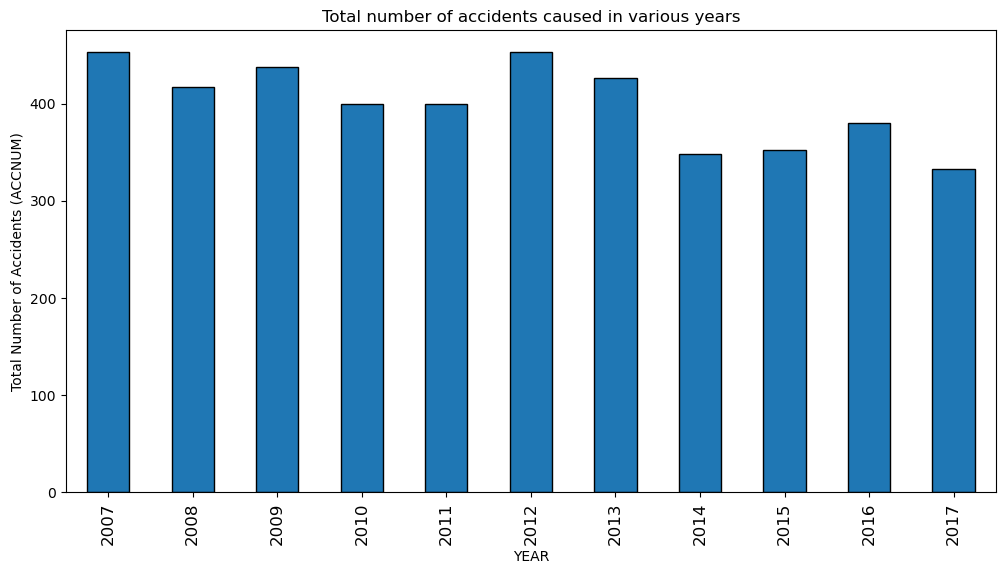

In [182]:
num_acc = df_clean.groupby('YEAR')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Total number of accidents caused in various years")
plt.ylabel('Total Number of Accidents (ACCNUM)')

ax = plt.gca()
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y')
num_acc.plot(kind='bar', edgecolor='black')
plt.show()

Here, we can see the accidents have slightly reduced over the period of 10 years.

### creating heatmap of accidents where injury is fatal

In [183]:
df_heat = df_clean[df_clean['INJURY'] == 'Fatal']
df_heat = df_clean[['LATITUDE', 'LONGITUDE', 'FATAL']]
latitude_toronto = df_heat.describe().at['mean','LATITUDE']
langitude_toronto = df_heat.describe().at['mean','LONGITUDE']
location = [latitude_toronto, langitude_toronto]
Fatal_map = folium.Map(location, zoom_start=10.455)
HeatMap(df_heat.values, min_opacity =0.3).add_to(Fatal_map)
Fatal_map

Here, from this heatmap, we can see that most of the fatal accidents have occurred in Toronto East York Region

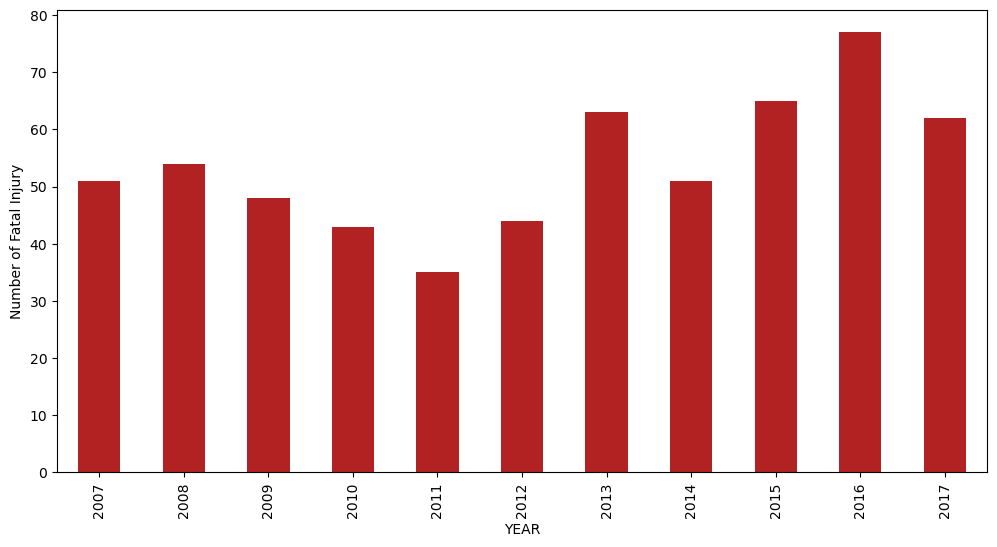

In [184]:
#Fatality over years (# of people died)
Fatal = df_clean[df_clean['INJURY'] =='Fatal']
Fatal = Fatal.groupby(df_clean['YEAR']).count()
plt.figure(figsize=(12,6))


plt.ylabel('Number of Fatal Injury')
Fatal['INJURY'].plot(kind='bar',color="firebrick")

plt.show()

fatal injury was highest in 2016

In [187]:
selected_districts = ['Toronto East York', 'Etobicoke York', 'Scarborough', 'North York']
select_df = uncleaned_df[uncleaned_df['District'].isin(selected_districts)]

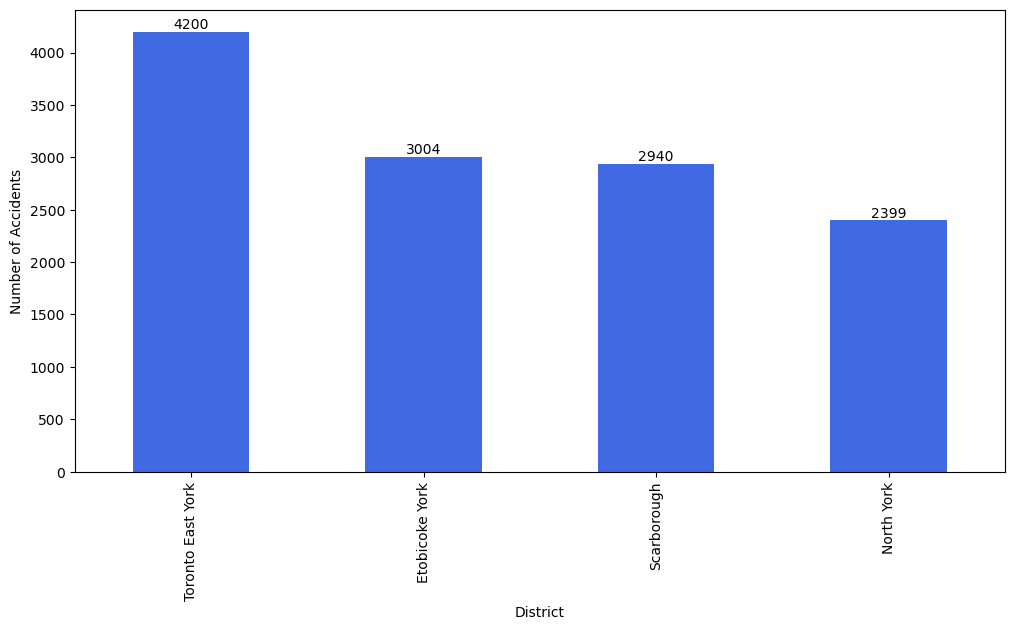

In [188]:
# Districts where most accident happens
region_counts = select_df['District'].value_counts()
plt.figure(figsize=(12, 6))
plt.ylabel('Number of Accidents')
region_counts.plot(kind='bar', color='royalblue', label='Number of Accidents')
for i, value in enumerate(region_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

### Driving condition VS accident caused by 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'  for EDA.

C:\Users\sabin\AppData\Local\Temp\ipykernel_10744\42797064.py:1: FutureWarning: The provided callable <function sum at 0x0000015125B639C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_clean_pie = df_clean.pivot_table(index='YEAR',


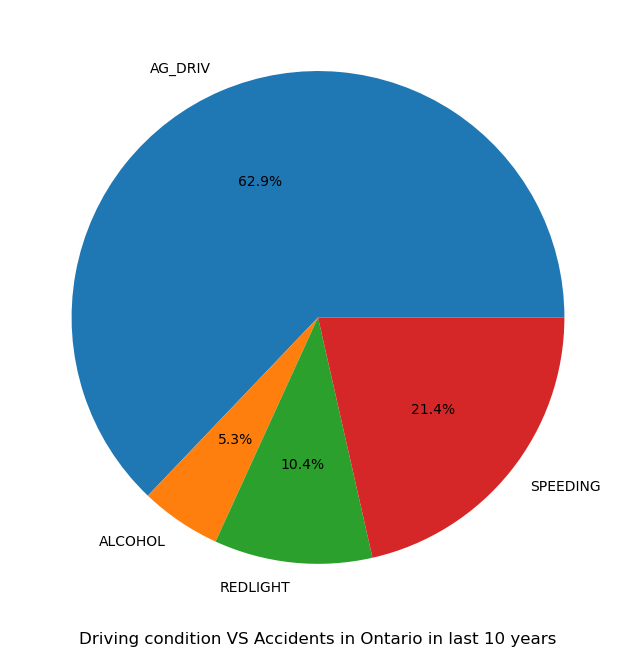

In [104]:
df_clean_pie = df_clean.pivot_table(index='YEAR', 
                           values = ['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(12,8))
df_clean_pie.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Driving condition VS Accidents in Ontario in last 10 years',fontsize=12) 
plt.show()

From the above chart, Aggressive and Distracted Driving is the major cause of accident contributing 57.2%, followed by sppeding 27.5%.

C:\Users\sabin\AppData\Local\Temp\ipykernel_10744\1337737599.py:1: FutureWarning: The provided callable <function sum at 0x0000015125B639C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_clean_type = df_clean.pivot_table(index='YEAR',


Text(0.5, 0, 'Vechile type VS Accidents in Ontario in last 10 years')

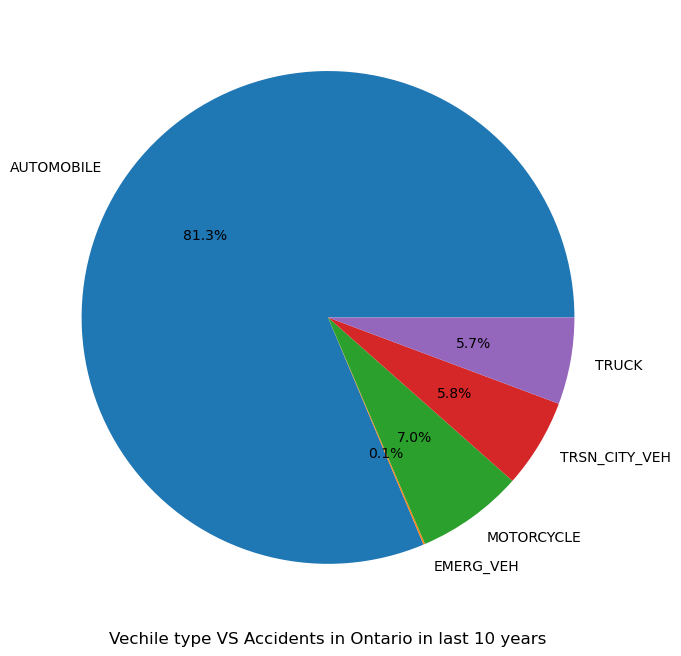

In [105]:
df_clean_type = df_clean.pivot_table(index='YEAR', 
                           values = [ 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')

fig, ax1 = plt.subplots(figsize=(12,8))
df_clean_type.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Vechile type VS Accidents in Ontario in last 10 years',fontsize=12)

### Accidents occured on what time of the day?

In [106]:
df_clean['TIMESTAMP'] = pd.to_datetime(df_clean.MONTH) + pd.to_timedelta(df_clean.HOUR, unit='h') + pd.to_timedelta(df_clean.MINUTES, unit='m')

In [107]:
bins = [0, 4, 8, 12, 16, 20, np.inf]
labels = ['12AM-4AM', '4AM-8AM','8AM-12PM', '12PM-4PM', '4PM-8PM', '8PM-12PM']
df_clean["TIMEOFDAY"] = pd.cut(df_clean["HOUR"], bins, labels = labels)

In [108]:
days_time = pd.DataFrame()
days_time['12AM-4AM'] = df_clean['YEAR'][df_clean['TIMEOFDAY']=='12AM-4AM'].value_counts()
days_time['4AM-8AM'] = df_clean['YEAR'][df_clean['TIMEOFDAY']=='4AM-8AM'].value_counts()
days_time['8AM-12PM'] = df_clean['YEAR'][df_clean['TIMEOFDAY']=='8AM-12PM'].value_counts()
days_time['12PM-4PM'] = df_clean['YEAR'][df_clean['TIMEOFDAY']=='12PM-4PM'].value_counts()
days_time['4PM-8PM'] =df_clean['YEAR'][df_clean['TIMEOFDAY']=='4PM-8PM'].value_counts()
days_time['8PM-12PM'] = df_clean['YEAR'][df_clean['TIMEOFDAY']=='8PM-12PM'].value_counts()
days_time.loc['Total']= days_time.sum()

### Which time has the most accidents happen?
### It is evident that the majority of incidents happened between the hours of 4 and 8 p.m., when most individuals attempt to go home from work.
### It should be highlighted that accidents occur most frequently between the hours of 12 and 4 PM, which corresponds to lunchtime to afternoon.
### During Daylight's regular business hours of 8 AM to 8 PM, the majority of accidents happened.


Text(0.5, 0, 'Time of the day vs total number accidents')

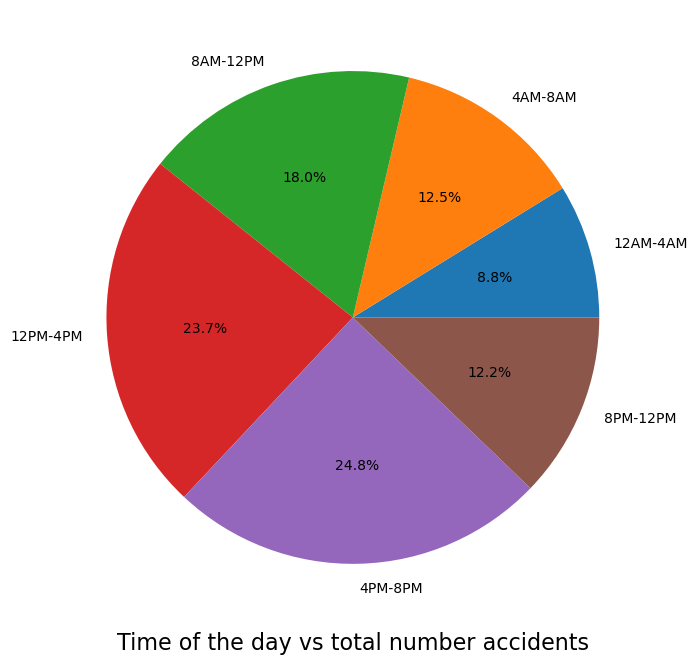

In [109]:
ig, ax = plt.subplots(1,1)
days_time.iloc[11].plot(kind='pie', ax=ax, autopct='%3.1f%%', figsize=(12,8), fontsize=10)
ax.set_ylabel('')
ax.set_xlabel('Time of the day vs total number accidents',fontsize=16)

In [110]:
loc = pd.DataFrame()
loc['Etobicoke'] = df_clean['YEAR'][df_clean['District']=='Etobicoke York'].value_counts()
loc['NorthYork'] = df_clean['YEAR'][df_clean['District']=='North York'].value_counts()
loc['Scarborough'] = df_clean['YEAR'][df_clean['District']=='Scarborough'].value_counts()
loc['EastYork'] = df_clean['YEAR'][df_clean['District']=='Toronto East York'].value_counts()
loc.loc['Total']= loc.sum()

In [111]:
loc

,Etobicoke,NorthYork,Scarborough,EastYork
YEAR,,,,
2007,392,273,371,438
2008,336,257,254,392
2012,296,210,320,522
2011,294,235,236,417
2010,282,173,274,455
2013,279,185,296,460
2009,275,240,290,437
2014,235,194,225,251
2016,234,218,237,305


In [112]:
df_clean.isnull().sum()

ACCNUM              0
YEAR                0
MONTH               0
DAY                 0
HOUR                0
MINUTES             0
WEEKDAY             0
LATITUDE            0
LONGITUDE           0
Ward_Name           0
Ward_ID             0
Hood_Name           0
Hood_ID             0
Division            0
District            1
STREET1             0
STREET2          1064
ROAD_CLASS          0
LOCCOORD           85
ACCLOC           4710
TRAFFCTL           24
VISIBILITY          2
LIGHT               2
RDSFCOND            7
ACCLASS             0
IMPACTYPE           0
INVTYPE             4
INVAGE              0
INJURY           6048
FATAL_NO            0
INITDIR          3788
VEHTYPE          1707
MANOEUVER        5443
DRIVACT          6356
DRIVCOND         6359
PEDESTRIAN          0
CYCLIST             0
AUTOMOBILE          0
MOTORCYCLE          0
TRUCK               0
TRSN_CITY_VEH       0
EMERG_VEH           0
PASSENGER           0
SPEEDING            0
AG_DRIV             0
REDLIGHT  

In [191]:
df_clean.dtypes

ACCNUM              int64
YEAR                int64
MONTH               int64
DAY                 int64
HOUR                int64
MINUTES             int64
WEEKDAY             int64
LATITUDE          float64
LONGITUDE         float64
Ward_Name        category
Ward_ID             int64
Hood_Name        category
Hood_ID             int64
Division         category
District         category
STREET1          category
STREET2          category
ROAD_CLASS       category
LOCCOORD         category
ACCLOC           category
TRAFFCTL         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
ACCLASS          category
IMPACTYPE        category
INVTYPE          category
INVAGE           category
INJURY           category
FATAL_NO            int64
INITDIR          category
VEHTYPE          category
MANOEUVER        category
DRIVACT          category
DRIVCOND         category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE  

In [199]:
df_train=df_clean[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE',  'Hood_ID',
        'District',  
         'VISIBILITY', 'LIGHT', 'RDSFCOND', 
        'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY','FATAL']]

In [200]:
df_train.isnull().sum()

YEAR             0
MONTH            0
DAY              0
HOUR             0
MINUTES          0
WEEKDAY          0
LATITUDE         0
LONGITUDE        0
Hood_ID          0
District         0
VISIBILITY       2
LIGHT            2
RDSFCOND         7
PEDESTRIAN       0
CYCLIST          0
AUTOMOBILE       0
MOTORCYCLE       0
TRUCK            0
TRSN_CITY_VEH    0
EMERG_VEH        0
PASSENGER        0
SPEEDING         0
AG_DRIV          0
REDLIGHT         0
ALCOHOL          0
DISABILITY       0
FATAL            0
dtype: int64

In [201]:
df_train['LATITUDE']=df_train['LATITUDE'].astype('int')
df_train['LONGITUDE']=df_train['LATITUDE'].astype('int')

C:\Users\sabin\AppData\Local\Temp\ipykernel_10744\3276076028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['LATITUDE']=df_train['LATITUDE'].astype('int')
C:\Users\sabin\AppData\Local\Temp\ipykernel_10744\3276076028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['LONGITUDE']=df_train['LATITUDE'].astype('int')


In [202]:
df_train.dtypes

YEAR                int64
MONTH               int64
DAY                 int64
HOUR                int64
MINUTES             int64
WEEKDAY             int64
LATITUDE            int32
LONGITUDE           int32
Hood_ID             int64
District         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE          int64
TRUCK               int64
TRSN_CITY_VEH       int64
EMERG_VEH           int64
PASSENGER           int64
SPEEDING            int64
AG_DRIV             int64
REDLIGHT            int64
ALCOHOL             int64
DISABILITY          int64
FATAL               int64
dtype: object

In [212]:
df_train.shape

(12543, 27)

### Converting categorical into numberical variables

In [203]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

df_cat = df_train[['VISIBILITY','RDSFCOND','LIGHT','District']]
df_cat_encoded = df_cat.apply(lambda x: label_encoder.fit_transform(x))


In [204]:
df_train[['VISIBILITY', 'RDSFCOND', 'LIGHT', 'District']] = df_cat_encoded

C:\Users\sabin\AppData\Local\Temp\ipykernel_10744\976534841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['VISIBILITY', 'RDSFCOND', 'LIGHT', 'District']] = df_cat_encoded


In [205]:
df_train

,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Hood_ID,District,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,2011,8,4,23,18,3,43,43,76,3,...,0,1,0,0,0,0,0,0,0,0
1,2012,8,19,23,18,6,43,43,118,2,...,0,0,0,1,1,1,0,0,0,0
2,2015,12,30,23,39,2,43,43,65,3,...,0,0,0,0,0,1,0,0,0,1
3,2012,8,19,23,18,6,43,43,118,2,...,0,0,0,1,1,1,0,0,0,0
4,2012,8,19,23,18,6,43,43,118,2,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,2012,3,2,18,12,4,43,43,73,3,...,0,0,0,0,1,1,0,0,0,0
12553,2012,3,2,18,12,4,43,43,73,3,...,0,0,0,0,1,1,0,0,0,0
12554,2012,3,2,18,12,4,43,43,73,3,...,0,0,0,0,1,1,0,0,0,0
12555,2016,7,2,18,12,5,43,43,77,3,...,0,0,0,1,1,1,0,0,0,1


In [210]:
correlation_matrix = df_train.corr()
correlation_matrix

,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Hood_ID,District,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
YEAR,1.000000,0.019767,0.023948,0.035984,-0.009335,0.034475,NaN,NaN,0.028103,0.003140,...,-0.021406,0.020740,0.018426,0.069176,0.013231,0.011208,-0.032882,-0.048161,-0.025460,0.056979
MONTH,0.019767,1.000000,0.004713,0.030322,-0.011070,0.000866,NaN,NaN,0.003255,0.003510,...,0.010151,-0.017285,0.017903,-0.040479,-0.046578,-0.035256,-0.034184,-0.005208,-0.015560,0.019237
DAY,0.023948,0.004713,1.000000,0.014692,-0.011152,0.019927,NaN,NaN,-0.005054,-0.020086,...,-0.007087,0.032788,-0.004869,-0.010986,-0.042397,-0.027930,-0.030877,0.022976,0.009895,-0.010912
HOUR,0.035984,0.030322,0.014692,1.000000,-0.047711,-0.055849,NaN,NaN,-0.008601,-0.022029,...,-0.042124,-0.036776,0.006102,-0.001368,-0.063733,-0.020103,-0.055984,-0.093587,0.004456,-0.054481
MINUTES,-0.009335,-0.011070,-0.011152,-0.047711,1.000000,-0.014687,NaN,NaN,-0.029803,-0.018174,...,0.018285,0.008719,0.031113,0.005185,-0.011795,0.010675,0.017396,0.014856,0.031844,0.016569
WEEKDAY,0.034475,0.000866,0.019927,-0.055849,-0.014687,1.000000,NaN,NaN,0.027901,0.012632,...,-0.085606,-0.009714,0.014344,0.101977,0.072670,0.019362,0.034943,0.091968,-0.041487,-0.009091
LATITUDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hood_ID,0.028103,0.003255,-0.005054,-0.008601,-0.029803,0.027901,NaN,NaN,1.000000,0.504804,...,-0.060968,0.001474,-0.012934,-0.030645,-0.031926,-0.037611,-0.013728,-0.001265,-0.000981,0.016345
District,0.003140,0.003510,-0.020086,-0.022029,-0.018174,0.012632,NaN,NaN,0.504804,1.000000,...,-0.025973,0.020422,-0.011757,-0.069587,-0.054955,-0.084349,-0.041331,-0.003753,-0.023200,-0.022544


# Model Training

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [121]:
X = df_train.drop('FATAL', axis=1)  # Features
y = df_train['FATAL']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
rf_model = RandomForestClassifier(
    n_estimators=100,  # You can adjust this parameter
    max_depth=10,       # Limit the maximum depth of the trees
    min_samples_leaf=5  # Set a minimum number of samples per leaf
)

rf_model.fit(X_train, y_train)

# Calculate train and test accuracy for Random Forest
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)

print("Random Forest:")
print("Train Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)

Random Forest:
Train Accuracy: 0.8990542558486809
Test Accuracy: 0.883359872611465


In [123]:
# Step 3: Confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_test_preds)
print("\nConfusion Matrix (Random Forest):\n", rf_conf_matrix)


Confusion Matrix (Random Forest):
 [[2174    0]
 [ 293   45]]


In [124]:
dt_model = DecisionTreeClassifier(
    random_state=32,
    max_depth=10,
)
dt_model.fit(X_train, y_train)

# Calculate train and test accuracy for Decision Trees
dt_train_preds = dt_model.predict(X_train)
dt_test_preds = dt_model.predict(X_test)

dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)

print("\nDecision Trees:")
print("Train Accuracy:", dt_train_accuracy)
print("Test Accuracy:", dt_test_accuracy)


Decision Trees:
Train Accuracy: 0.932702837232454
Test Accuracy: 0.910031847133758


In [125]:
# Confusion matrix for Decision Trees
dt_conf_matrix = confusion_matrix(y_test, dt_test_preds)
print("\nConfusion Matrix (Decision Trees):\n", dt_conf_matrix)


Confusion Matrix (Decision Trees):
 [[2159   15]
 [ 211  127]]


# 